In [1]:
import sys
import numpy as np

from pyDFCSR_2D.CSR import CSR2D
import matplotlib.pyplot as plt
from matplotlib import cm
import h5py
from pyDFCSR_2D.tools import plot_surface

## Run DFCSR

In [3]:
testCSR = CSR2D(input_file= 'input/dipole_config.yaml')
testCSR.CSR_params.transverse_on = 0

start reinterpolation. number of slice 1
xbins = 500  zbins =  500


In [4]:
testCSR.run()

Starting the DFCSR run
Beam at position 0.1 is written to C:\Users\yingb\Desktop\pyDFCSR\pyDFCSR_2D\example\output\dipole-2024-06-20T09_30_41-07_00-particles-1.h5
Wakes written to  C:\Users\yingb\Desktop\pyDFCSR\pyDFCSR_2D\example\output\dipole-2024-06-20T09_30_41-07_00-wakes.h5
Finish step 1, s = 0.1,  in 2.384737491607666 seconds
Finish step 2, s = 0.2,  in 2.1609654426574707 seconds
Finish step 3, s = 0.30000000000000004,  in 2.1295998096466064 seconds
Finish step 4, s = 0.4,  in 2.125420570373535 seconds
Finish step 5, s = 0.5,  in 2.4239752292633057 seconds
Finish step 6, s = 0.6,  in 2.284331798553467 seconds
Finish step 7, s = 0.7,  in 2.2294387817382812 seconds
Finish step 8, s = 0.7999999999999999,  in 2.2798924446105957 seconds
Finish step 9, s = 0.8999999999999999,  in 2.1718780994415283 seconds
Beam at position 0.9999999999999999 is written to C:\Users\yingb\Desktop\pyDFCSR\pyDFCSR_2D\example\output\dipole-2024-06-20T09_30_41-07_00-particles-10.h5
Finish step 10, s = 0.9999

## Parallel Run with MPI

In [5]:
# input yaml file in "./input/dipole_config.yaml"
!mpirun -n 4 python  -m pyDFCSR_mpi_run ./input/chicane_config.yaml

'mpirun' is not recognized as an internal or external command,
operable program or batch file.


## Plot output

In [5]:
from pyDFCSR_2D.postprocessor import DFCSR_postprocessor

DFplot = DFCSR_postprocessor(run_name = 'dipole-2024-06-20T09_30_41-07_00',
                             work_dir = './output')

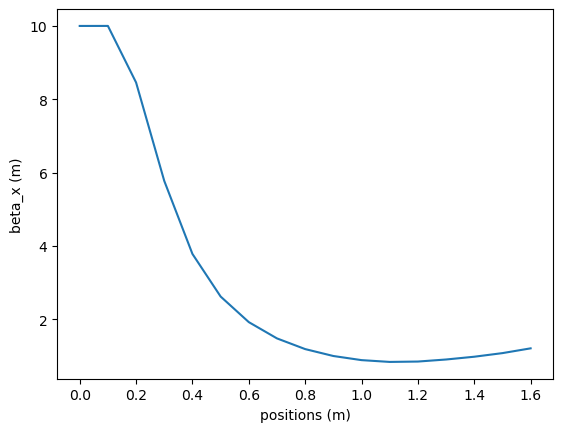

In [6]:
# Plot beam size along the lattice
x, y = DFplot.get_statistics(key = 'beta_x', show_plot = True)

plot longitudinal wakes at nearest point s  = 0.7 m, step count 7
ebeam energy 5000000026.236993


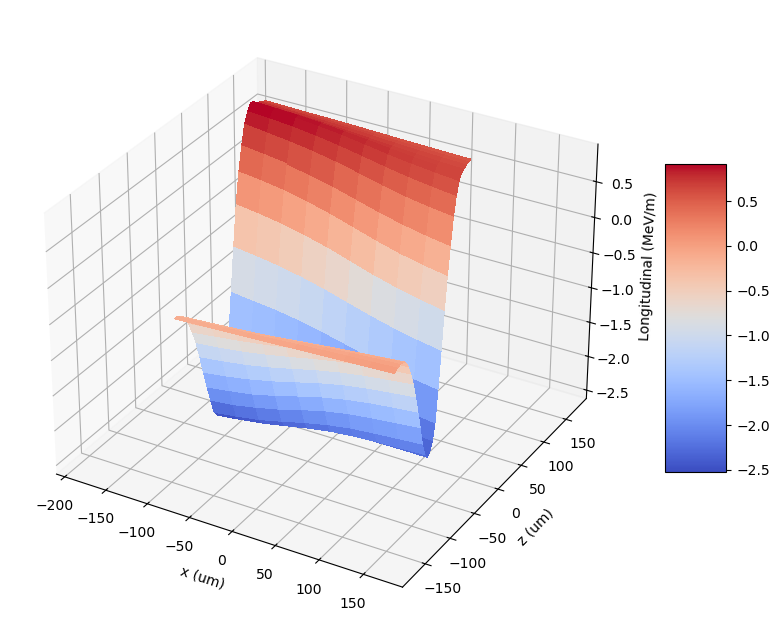

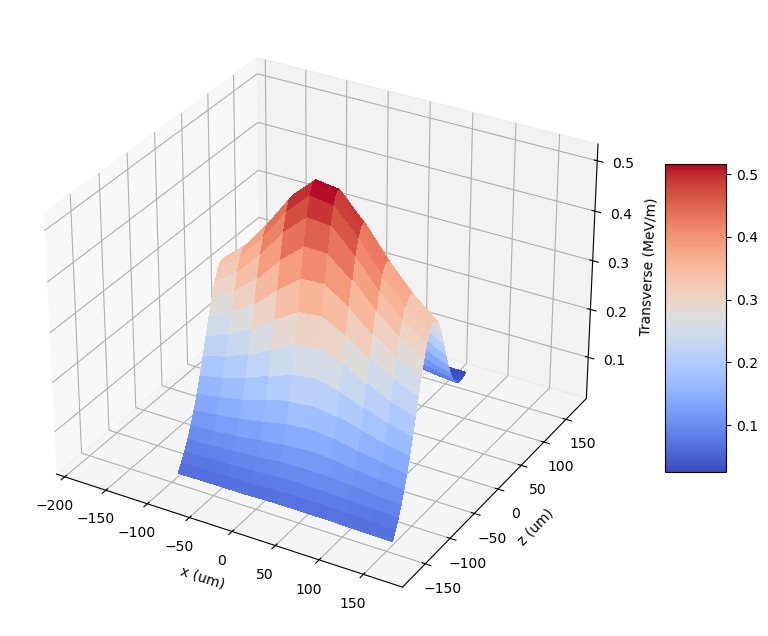

In [7]:
x_grids, z_grids, xkicks, dE_dct = DFplot.get_wakes(s = 0.7, show_plot = True)

Reading  C:\Users\yingb\Desktop\pyDFCSR\pyDFCSR_2D\example\output\dipole-2024-06-20T09_30_41-07_00-particles-10.h5


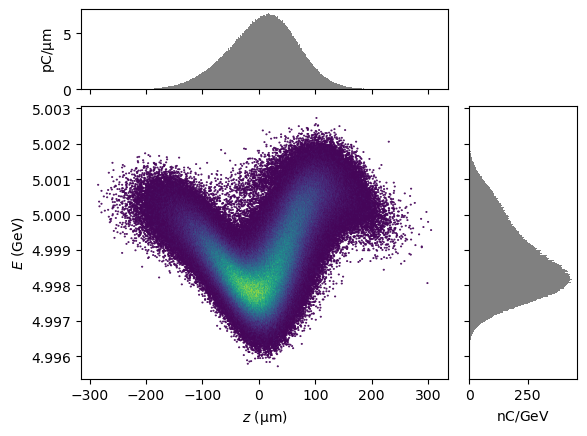

In [8]:
from pmd_beamphysics.plot import density_and_slice_plot
pg  = DFplot.get_particles(step = 10)
pg.plot('z', 'energy')

In [10]:
pg.charge

9.999999999999965e-10

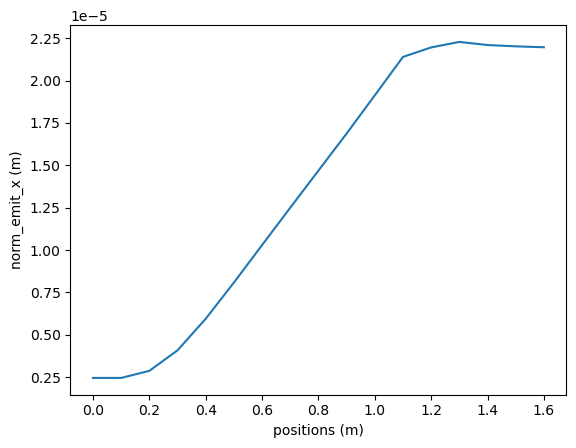

In [9]:
x, y = DFplot.get_statistics(key = 'norm_emit_x', show_plot = True)